Objective:

Utilize Python, Pandas, NumPy, and SciPy to conduct a thorough analysis of the “Airplane Crashes and Fatalities upto 2023” dataset. This challenge will encompass data cleaning, exploratory analysis, statistical testing, and visualization to draw meaningful insights.
Dataset:

Work with the “Airplane Crashes and Fatalities upto 2023” dataset, which provides comprehensive details about airplane crashes, including dates, locations, fatalities, and more. Access the dataset here.
Tasks:

    Data Import and Cleaning:

    Import the dataset using Pandas.
    Clean and preprocess the data, addressing missing values and categorizing data as needed.

    Convert dates and other relevant fields to appropriate formats.


In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Airplane_Crashes_and_Fatalities.csv', encoding='latin-1')
df.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4221 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew        4757 non-null   float64
 15  Grou

In [128]:
df.isna().sum()

,0
Date,0
Time,1512
Location,4
Operator,10
Flight #,3669
Route,777
AC Type,15
Registration,274
cn/ln,668
Aboard,18


In [129]:
# dropping columns that won't be used in analysis
df = df.drop(columns=['Summary','Operator', 'Ground', 'Fatalities Crew', 'Fatalities Passangers', 'Aboard Crew', 'Aboard Passangers', 'cn/ln', 'Registration', 'AC Type', 'Route', 'Flight #', 'Time'])

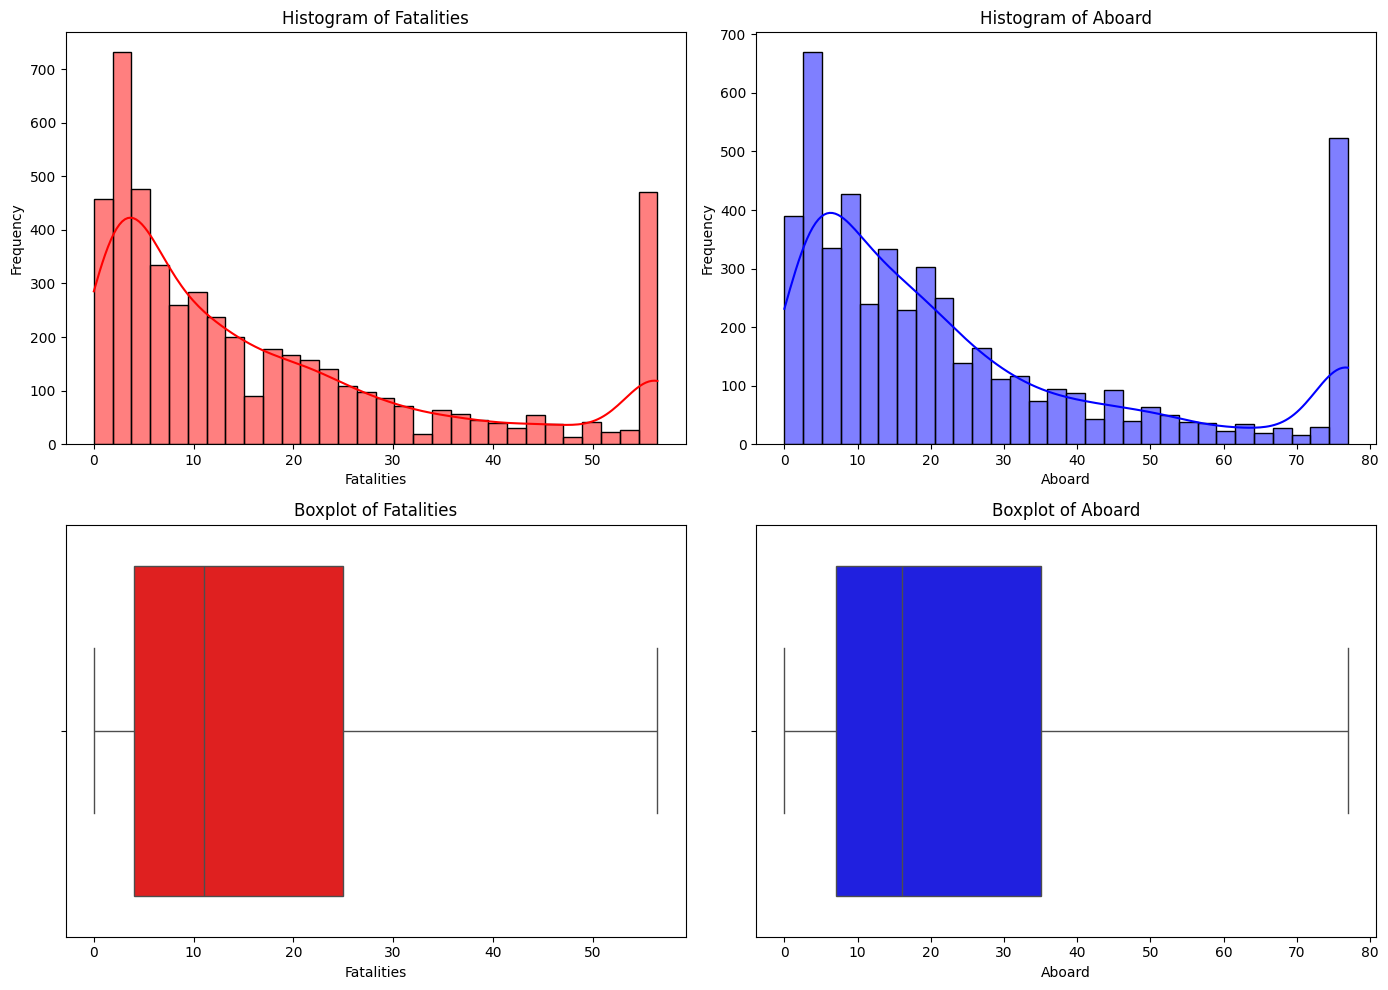

In [137]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fatalities = df['Fatalities'].dropna()
aboard = df['Aboard'].dropna()

sns.histplot(fatalities, bins=30, kde=True, ax=axes[0, 0], color='red')
axes[0, 0].set_title('Histogram of Fatalities')
axes[0, 0].set_xlabel('Fatalities')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(aboard, bins=30, kde=True, ax=axes[0, 1], color='blue')
axes[0, 1].set_title('Histogram of Aboard')
axes[0, 1].set_xlabel('Aboard')
axes[0, 1].set_ylabel('Frequency')


sns.boxplot(x=fatalities, ax=axes[1, 0], color='red')
axes[1, 0].set_title('Boxplot of Fatalities')
axes[1, 0].set_xlabel('Fatalities')


sns.boxplot(x=aboard, ax=axes[1, 1], color='blue')
axes[1, 1].set_title('Boxplot of Aboard')
axes[1, 1].set_xlabel('Aboard')

plt.tight_layout()
plt.show()
# checking valuable stats to decide on next action

In [131]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Fatalities'] = df['Fatalities'].fillna(df['Fatalities'].median())
df['Aboard'] = df['Aboard'].fillna(df['Aboard'].median())
df['Location'] = df['Location'].dropna()

In [132]:
from scipy.stats import skew, kurtosis

fatalities_skewness = skew(df['Fatalities'])
fatalities_kurtosis = kurtosis(df['Fatalities'])

print(f"Skewness of Fatalities: {fatalities_skewness}")
print(f"Kurtosis of Fatalities: {fatalities_kurtosis}")

aboard_skewness = skew(df['Aboard'])
aboard_kurtosis = kurtosis(df['Aboard'])

print(f"Skewness of Aboard: {aboard_skewness}")
print(f"Kurtosis of Aboard: {aboard_kurtosis}")

Skewness of Fatalities: 4.610061954116649
Kurtosis of Fatalities: 36.65708117102928
Skewness of Aboard: 3.9195743507047567
Kurtosis of Aboard: 23.930103388139432


In [133]:
df['Fatalities_Log'] = np.log(df['Fatalities'] + 1)
df['Aboard_Log'] = np.log(df['Aboard'] + 1)

df['Fatalities_Sqrt'] = np.sqrt(df['Fatalities'])
df['Aboard_Sqrt'] = np.sqrt(df['Aboard'])

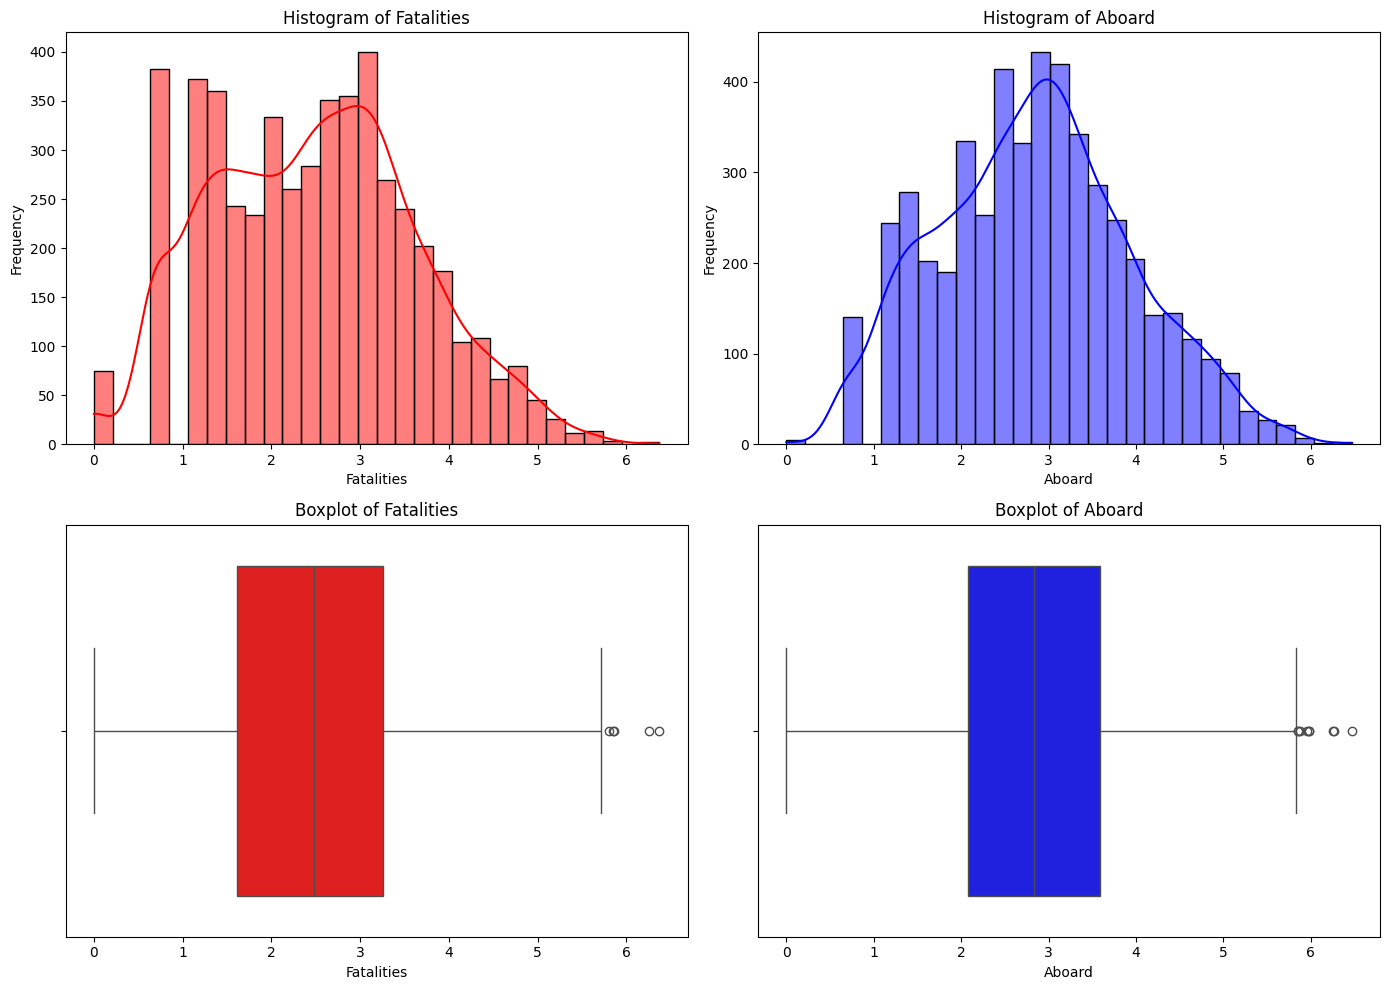

In [138]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fatalities = df['Fatalities_Log'].dropna()
aboard = df['Aboard_Log'].dropna()

sns.histplot(fatalities, bins=30, kde=True, ax=axes[0, 0], color='red')
axes[0, 0].set_title('Histogram of Fatalities')
axes[0, 0].set_xlabel('Fatalities')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(aboard, bins=30, kde=True, ax=axes[0, 1], color='blue')
axes[0, 1].set_title('Histogram of Aboard')
axes[0, 1].set_xlabel('Aboard')
axes[0, 1].set_ylabel('Frequency')


sns.boxplot(x=fatalities, ax=axes[1, 0], color='red')
axes[1, 0].set_title('Boxplot of Fatalities')
axes[1, 0].set_xlabel('Fatalities')


sns.boxplot(x=aboard, ax=axes[1, 1], color='blue')
axes[1, 1].set_title('Boxplot of Aboard')
axes[1, 1].set_xlabel('Aboard')

plt.tight_layout()
plt.show()

#looks good enough imo

In [136]:
Q1_fatalities = fatalities.quantile(0.25)
Q3_fatalities = fatalities.quantile(0.75)
IQR_fatalities = Q3_fatalities - Q1_fatalities

lower_bound_fatalities = Q1_fatalities - 1.5 * IQR_fatalities
upper_bound_fatalities = Q3_fatalities + 1.5 * IQR_fatalities

df['Fatalities'] = np.where(df['Fatalities'] > upper_bound_fatalities, upper_bound_fatalities, df['Fatalities'])
df['Fatalities'] = np.where(df['Fatalities'] < lower_bound_fatalities, lower_bound_fatalities, df['Fatalities'])

Q1_aboard = aboard.quantile(0.25)
Q3_aboard = aboard.quantile(0.75)
IQR_aboard = Q3_aboard - Q1_aboard

lower_bound_aboard = Q1_aboard - 1.5 * IQR_aboard
upper_bound_aboard = Q3_aboard + 1.5 * IQR_aboard

df['Aboard'] = np.where(df['Aboard'] > upper_bound_aboard, upper_bound_aboard, df['Aboard'])
df['Aboard'] = np.where(df['Aboard'] < lower_bound_aboard, lower_bound_aboard, df['Aboard'])

Exploratory Data Analysis:

    Use Pandas to explore basic statistics such as the number of crashes, fatalities, and survival rates.

    Analyze the frequency of crashes over time to identify any trends.

   

In [112]:
crashes = len(df)
fatalities = df['Fatalities'].sum()
survival_rate = (len(df) - df['Fatalities'].sum()) / len(df) * 100

print(f"Number of Crashes: {crashes}")
print(f"Number of Fatalities: {fatalities}")
print(f"Survival Rate: {survival_rate:.2f}%")

df['Year'] = df['Date'].dt.to_period('Y')
frequency = df.groupby('Year').size().reset_index(name='Count')
frequency['Year'] = frequency['Year'].dt.to_timestamp()
frequency.set_index('Year', inplace=True)
frequency.head()


Number of Crashes: 4998
Number of Fatalities: 23439.242390896914
Survival Rate: -368.97%


,Count
Year,
1908-01-01,1
1909-01-01,1
1912-01-01,1
1913-01-01,3
1915-01-01,2


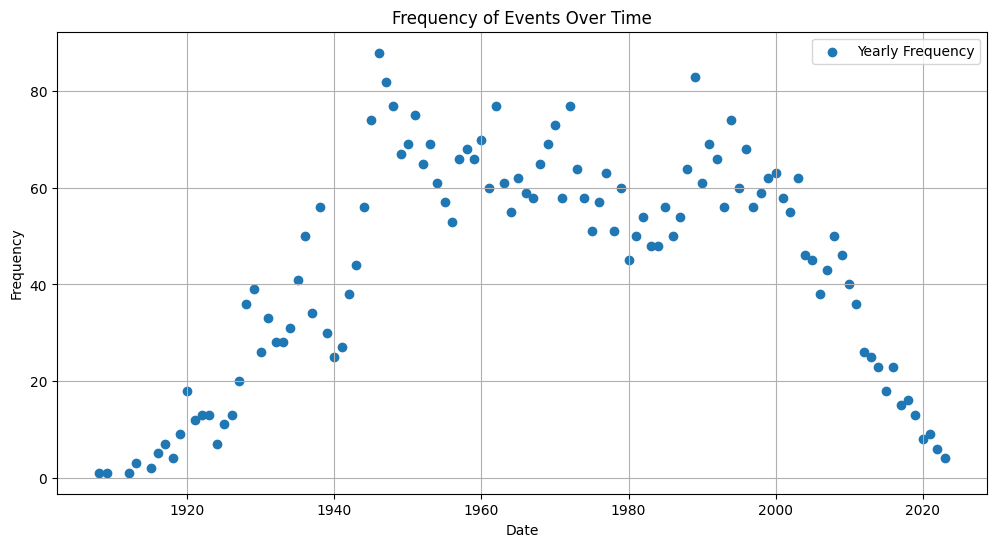

In [139]:
plt.figure(figsize=(12, 6))
plt.scatter(frequency.index, frequency['Count'],label='Yearly Frequency')
plt.title('Frequency of Events Over Time')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.grid()
plt.legend()
plt.show()

As we can see perioud between 1940th and 2000th was the peak of crashes, beginning to rise in 1940th and being somewhat consinstent across these 60 years and falling down in 2000th. So if we don't have any additional data(like corelation between past wars and crashes or smth) we can claim that since 2000th safety of the airplanes was significatly improved

 Statistical Analysis:

    Apply SciPy to analyze the distribution of fatalities and survival rates. Calculate key statistics like mean, median, and standard deviation.

    Conduct a hypothesis test (e.g., comparing the average number of fatalities in different decades or regions).

   

In [140]:
from scipy import stats

df['SurvivalRate'] = (df['Aboard_Log'] - df['Fatalities_Log']) / df['Aboard_Log']
survival_rate = df['SurvivalRate'].dropna()
fatalities = df['Fatalities_Log'].dropna()
fatalities_stats = {
    'mean': stats.tmean(fatalities),
    'median': fatalities.median(),
    'std': stats.tstd(fatalities),
    'min': stats.tmin(fatalities),
    'max': stats.tmax(fatalities)
}

survival_stats = {
    'mean': stats.tmean(survival_rate),
    'median': survival_rate.median(),
    'std': stats.tstd(survival_rate),
    'min': stats.tmin(survival_rate),
    'max': stats.tmax(survival_rate)
}

print("Fatalities Statistics:", fatalities_stats)
print("Survival Rate Statistics:", survival_stats)

Fatalities Statistics: {'mean': 2.4773356801945376, 'median': 2.4849066497880004, 'std': 1.1538753210635315, 'min': 0.0, 'max': 6.369900982828227}
Survival Rate Statistics: {'mean': 0.11328445877202467, 'median': 0.0, 'std': 0.22871284474929027, 'min': -0.16328580511547022, 'max': 1.0}


In [141]:
df['Decade'] = (df['Date'].dt.year // 10) * 10
decade_groups = df.groupby('Decade')['Fatalities']
fatalities_1980s = decade_groups.get_group(1980).dropna()
fatalities_1990s = decade_groups.get_group(1990).dropna()

t_stat, p_value = stats.ttest_ind(fatalities_1980s, fatalities_1990s, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Significant difference in fatalities between 1980s and 1990s.")
else:
    print("No significant difference in fatalities between 1980s and 1990s.")


T-statistic: 2.637582667156139, P-value: 0.008462374631153605
Significant difference in fatalities between 1980s and 1990s.


 Visualization:

    Create charts and graphs using Matplotlib and Seaborn to visualize the findings from your exploratory data analysis and statistical tests.

    Examples might include time series plots of crashes over years, bar charts of crashes by region, and histograms of fatalities.


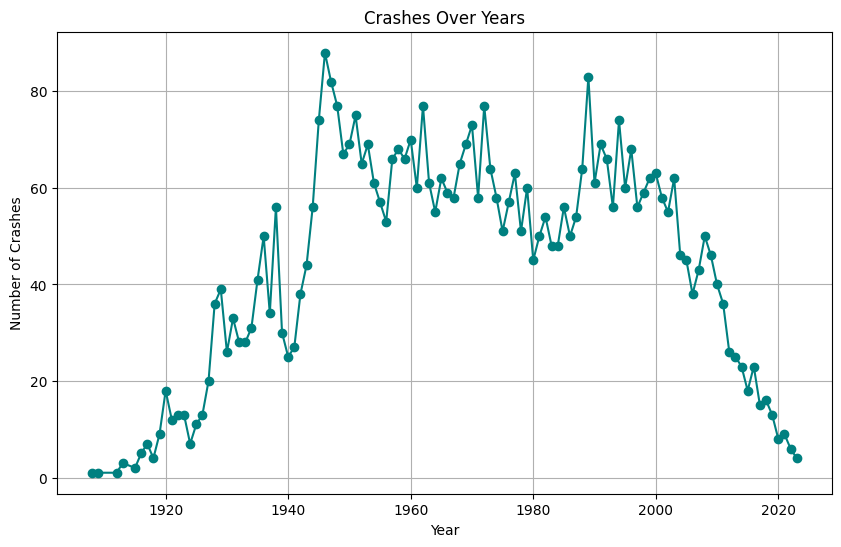

In [142]:
df['Year'] = df['Date'].dt.year
crashes_per_year = df.groupby('Year').size()

plt.figure(figsize=(10, 6))
crashes_per_year.plot(kind='line', color='teal', marker='o')
plt.title('Crashes Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.grid(True)
plt.show()

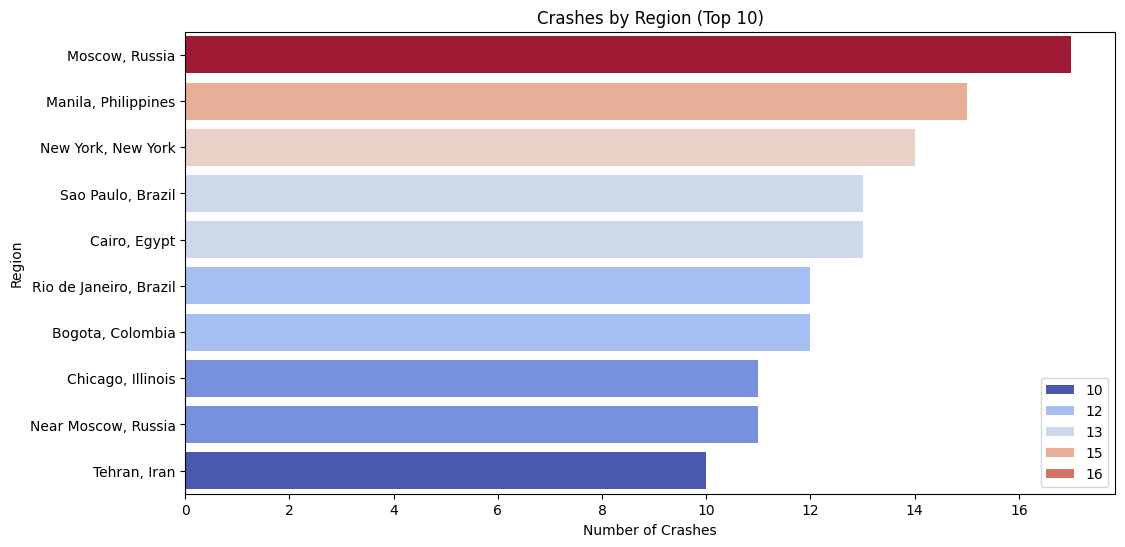

In [143]:
crashes_by_region = df['Location'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=crashes_by_region.values, y=crashes_by_region.index, palette='coolwarm', hue = crashes_by_region.values)
plt.title('Crashes by Region (Top 10)')
plt.xlabel('Number of Crashes')
plt.ylabel('Region')
plt.show()

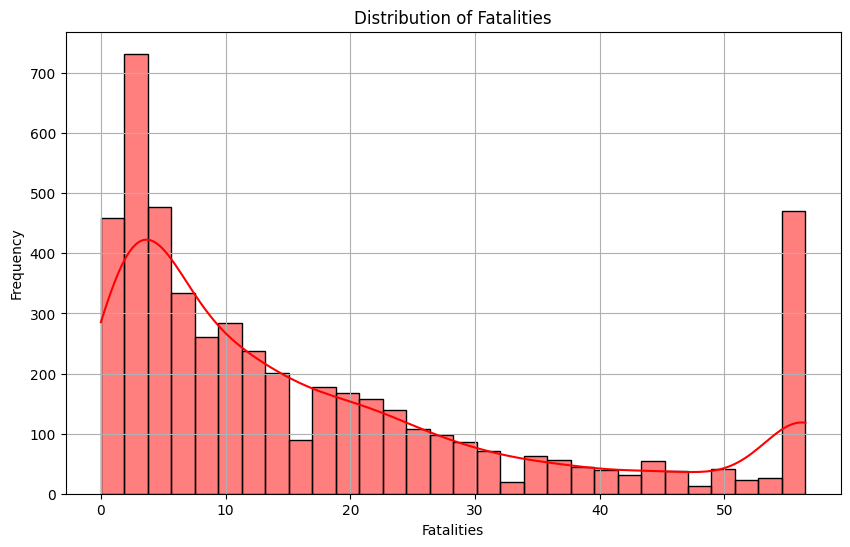

In [147]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Fatalities'], bins=30, kde=True, color='red')
plt.title('Distribution of Fatalities')
plt.xlabel('Fatalities')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


    Insight and Report:

    Summarize your findings and provide insights into the patterns or anomalies discovered in the data.
    Prepare a well-structured report including all code, visualizations, and interpretations.

Crashes over years show that initially they rose which is most likely attributed to planes becaming more popular while still being a risky way of transportation and since 2000th the safety was improved.
Also we can note that Moscow has highest number of crashes
Crashes with high fatalities are a rare occurance, most of them end with less than 10 of those.
In terms of anomalies we can see that despite frequency of fatalities having negative corelation, once fatalities reach over 50 frequency of those rises drastically